In [74]:
import numpy as np
from matplotlib import pyplot as plt
from astropy import constants as c
from astropy import units as u

In [75]:
# parse a text file with two columns and return as two numpy arrays
def parse_file(filename):
    data = np.loadtxt(filename)
    x = data[:,0]
    y = data[:,1]
    return x, y
    

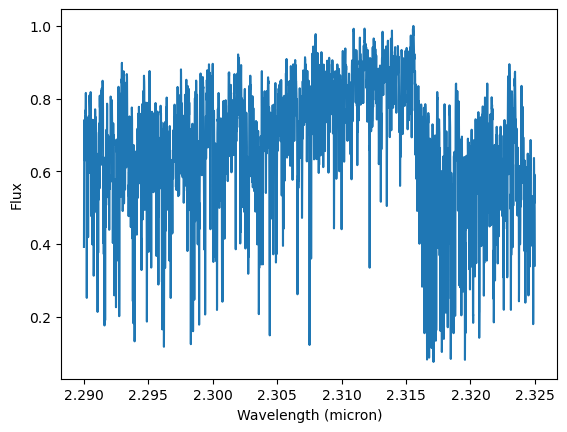

In [76]:
# pick the model for 1500 K, and log g = 5.5
CH4wvs, CH4flux = parse_file('./template_spectra/ch4/model_ugps_t=1500_g=3160.txt')
CH4wvs = CH4wvs * 1e6
CH4wvs, CH4flux = CH4wvs[CH4wvs > 2.290], CH4flux[CH4wvs > 2.290]
CH4wvs, CH4flux = CH4wvs[CH4wvs < 2.325], CH4flux[CH4wvs < 2.325]
CH4flux /= np.nanmax(CH4flux)
plt.figure()
plt.plot(CH4wvs, CH4flux)
plt.xlabel('Wavelength (micron)')
plt.ylabel('Flux')
plt.show()
plt.close()

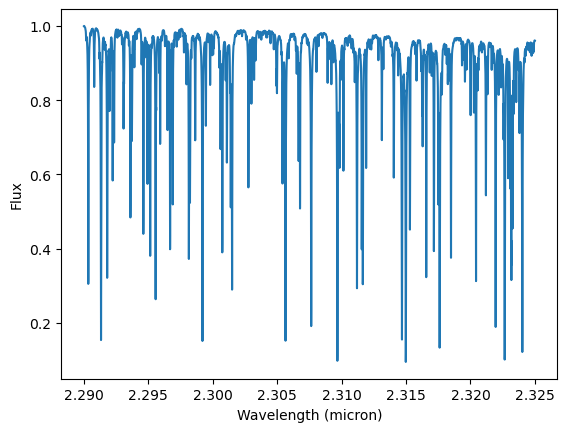

In [77]:
# pick the model for 1500 K, and log g = 5.5
H2Owvs, H2Oflux = parse_file('./template_spectra/h2o/model_ugps_t=1500_g=3160.txt')
H2Owvs = H2Owvs * 1e6
H2Owvs, H2Oflux = H2Owvs[H2Owvs > 2.290], H2Oflux[H2Owvs > 2.290]
H2Owvs, H2Oflux = H2Owvs[H2Owvs < 2.325], H2Oflux[H2Owvs < 2.325]
H2Oflux /= np.nanmax(H2Oflux)
plt.figure()
plt.plot(H2Owvs, H2Oflux)
plt.xlabel('Wavelength (micron)')
plt.ylabel('Flux')
plt.show()
plt.close()

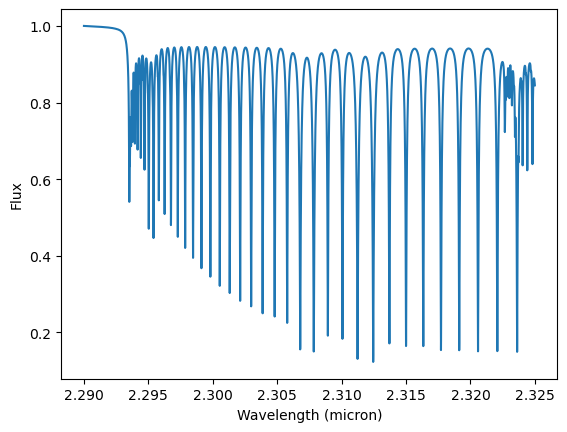

In [78]:
# pick the model for 1500 K, and log g = 5.5
COwvs, COflux = parse_file('./template_spectra/co/model_ugps_t=1500_g=3160.txt')
COwvs = COwvs * 1e6
COwvs, COflux = COwvs[COwvs > 2.290], COflux[COwvs > 2.290]
COwvs, COflux = COwvs[COwvs < 2.325], COflux[COwvs < 2.325]
COflux /= np.nanmax(COflux)
plt.figure()
plt.plot(COwvs, COflux)
plt.xlabel('Wavelength (micron)')
plt.ylabel('Flux')
plt.show()
plt.close()

In [79]:
def parse_csv_file(filename, xunit, yunit):
    data = np.loadtxt(filename, delimiter=',', usecols=(0,1))
    return np.sort(data[:,0]) * xunit, data[:,1][np.argsort(data[:,0])] * yunit

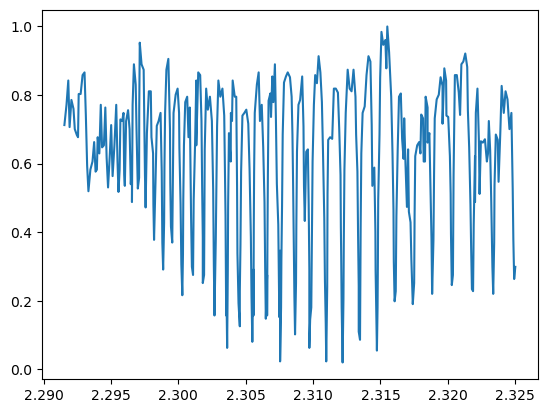

In [80]:
kpic_wvs, kpic_flux = \
    parse_csv_file("./measurements/kpic_hr8799c.csv", u.micron, u.erg/u.s/u.cm**2/u.micron)
kpic_flux /= np.nanmax(kpic_flux)
plt.figure()
plt.plot(kpic_wvs, kpic_flux)
plt.show()

In [81]:
# lambda_observed = lambda_emitted * (1 + v/c)
RV_c = -12.5 * u.km/u.s
for wvs in [CH4wvs, H2Owvs, COwvs]:
    wvs *= (1 + (RV_c / c.c).to(u.dimensionless_unscaled).value)

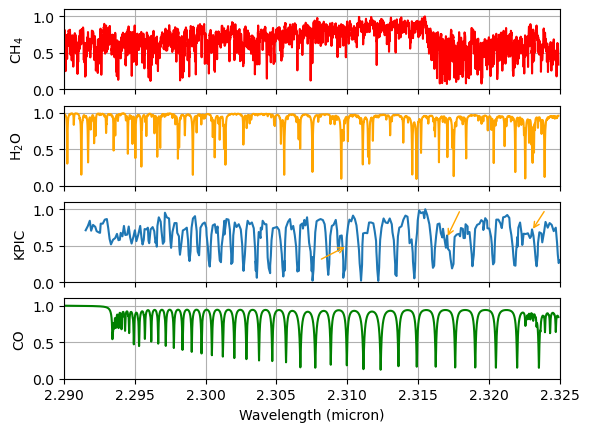

In [100]:
# four subplots one below the other
fig, axs = plt.subplots(4, 1, sharex=True, sharey=True)
for ax in axs:
    ax.set_xlim(2.290, 2.325)
    ax.set_ylim(0, 1.1)
    ax.set_yticks([0, 0.5, 1])
    ax.grid()
axs[0].plot(CH4wvs, CH4flux, color='red')
axs[0].set_ylabel(r'CH$_4$')
axs[1].plot(H2Owvs, H2Oflux, color='orange')
axs[1].set_ylabel(r'H$_2$O')
axs[2].plot(kpic_wvs, kpic_flux)
axs[2].set_ylabel('KPIC')
axs[2].annotate('', xy=(2.31, 0.5), xytext=(2.308, 0.3), arrowprops=dict(arrowstyle='->', color='orange'))
axs[2].annotate('', xy=(2.317, 0.6), xytext=(2.318, 1), arrowprops=dict(arrowstyle='->', color='orange'))
axs[2].annotate('', xy=(2.323, 0.7), xytext=(2.324, 1), arrowprops=dict(arrowstyle='->', color='orange'))
axs[3].plot(COwvs, COflux, color='green')
axs[3].set_ylabel('CO')
axs[3].set_xlabel('Wavelength (micron)')
plt.savefig('./plots/species_spectra.png', dpi=300)
plt.show()